© Ritwik Chandra Pandey


2nd MSc (Maths) - Specialisation in CS

##IMPORTING LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image, display
import warnings
import seaborn as sns

## IGNORING WARNINGS

In [ ]:
warnings.filterwarnings('ignore')

##IMPORTING THE DATASET

In [ ]:
Train_data = pd.read_csv('train.csv')
Test_data = pd.read_csv('test.csv')

## BASIC INFORMATION ABOUT THE DATASET

### Number of Null values in each column of Train_data and Test_data

In [ ]:
pd.set_option('display.max_rows', None)
Train_data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [ ]:
Test_data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [ ]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [ ]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [ ]:
#Describing the label to be predicted in train.scv
Train_data['revenue'].describe() 

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

##DATA PREPROCESSING

The zero values in P columns are actually null values. So, Multivariate imputation by chained equations is used to replace the missing values in some of these features.

In [ ]:
Train_data = Train_data.dropna() #Dropping rows with NaN values
imp_train = IterativeImputer(max_iter=5, missing_values=0, sample_posterior=True, min_value=1, random_state=37)
imp_test = IterativeImputer(max_iter=5, missing_values=0, sample_posterior=True, min_value=1, random_state=23)
p_data = ['P'+str(i) for i in range(1,38)]
Train_data[p_data] = np.round(imp_train.fit_transform(Train_data[p_data]))
Test_data[p_data] = np.round(imp_test.fit_transform(Test_data[p_data]))

Using encoder to encode some columns as part of preprocessing.

In [ ]:
Encoder =  OneHotEncoder()

Preprocessing data in Train.csv file. 



In [ ]:
Train_data_dropped = Train_data.drop(['Id', 'City'], axis=1)
city_reshaped = np.array(Train_data_dropped['City Group']).reshape(-1, 1)
city_values = Encoder.fit_transform(city_reshaped)
city_type = pd.DataFrame(city_values.toarray(), columns=['Big Cities', 'Other'])
type_reshaped =np.array(Train_data_dropped['Type']).reshape(-1, 1)
type_values = Encoder.fit_transform(type_reshaped)
type_encoded = pd.DataFrame(type_values.toarray(), columns=['DT', 'FC', 'IL'])
df_encoded = pd.concat([city_type, type_encoded], axis=1)
Train_encoded = pd.concat([df_encoded, Train_data_dropped], axis=1)
Train_encoded = Train_encoded.drop(['City Group', 'Type'], axis=1)

Preprocessing data in Test.csv file.

In [ ]:
Test_data_dropped = Test_data.drop(['Id', 'City'], axis=1)
#In train data there is no Type MB so we replace MB with DT in test data (only one is there).
Test_data_dropped.loc[Test_data_dropped['Type'] == 'MB', 'Type'] = 'DT' 
city_reshaped = np.array(Test_data_dropped['City Group']).reshape(-1, 1)
city_values = Encoder.fit_transform(city_reshaped)
city_type = pd.DataFrame(city_values.toarray(), columns=['Big Cities', 'Other'])
type_reshaped =np.array(Test_data_dropped['Type']).reshape(-1, 1)
type_values = Encoder.fit_transform(type_reshaped)
type_encoded = pd.DataFrame(type_values.toarray(), columns=['DT', 'FC', 'IL'])
df_encoded = pd.concat([city_type, type_encoded], axis=1)
Test_encoded = pd.concat([df_encoded, Test_data_dropped], axis=1)
Test_encoded = Test_encoded.drop(['City Group', 'Type'], axis=1)

Handling Date column so that number of days the restruant was open can be taken into consideration. 

In [ ]:
Train_encoded['Open Date']  = pd.to_datetime(Train_encoded['Open Date'])
Test_encoded['Open Date']  = pd.to_datetime(Test_encoded['Open Date'])
Launch_date_max = max(max(Test_encoded['Open Date']), max(Train_encoded['Open Date']))
Train_encoded['Days Open'] = (Launch_date_max - Train_encoded['Open Date']).dt.days / 1000
Test_encoded['Days Open'] = (Launch_date_max - Test_encoded['Open Date']).dt.days / 1000
Train_encoded.drop('Open Date', axis=1, inplace=True)
Test_encoded.drop('Open Date', axis=1, inplace=True)

### CHECKING FOR SKEWNESS OF REVENUE

Skewness: 2.793479



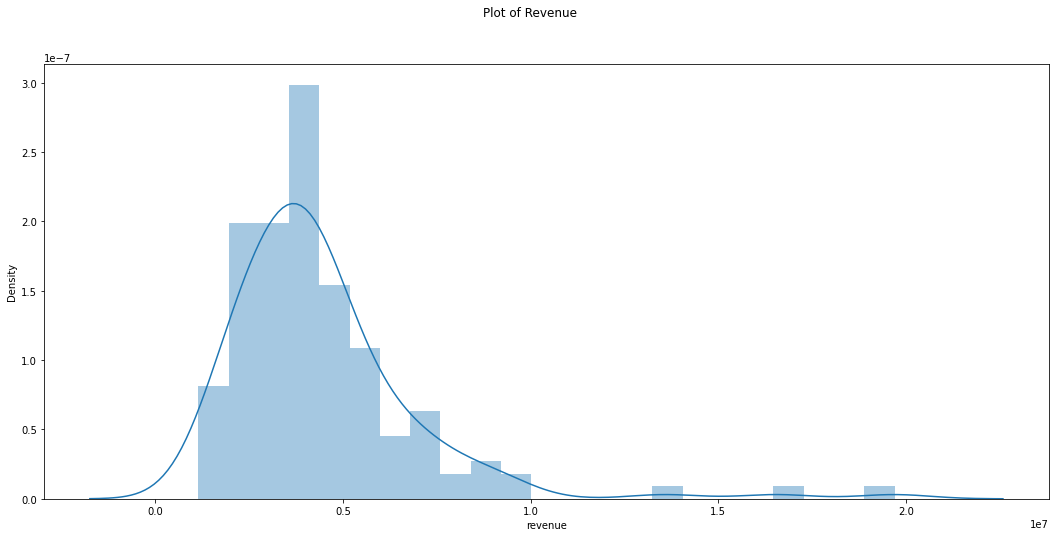

In [ ]:
fig = plt.figure(figsize=(18,8))
sns.distplot(Train_encoded['revenue'])
plt.suptitle( "Plot of Revenue")
print("Skewness: %f" % Train_encoded['revenue'].skew() + "\n")
plt.show()

Since we will be experimenting with linear models, the target variable is transformed to make it normally distributed for improved model interpretation. Definitely, the final predictions will need to be exponentiated to rescale the results back to normal.

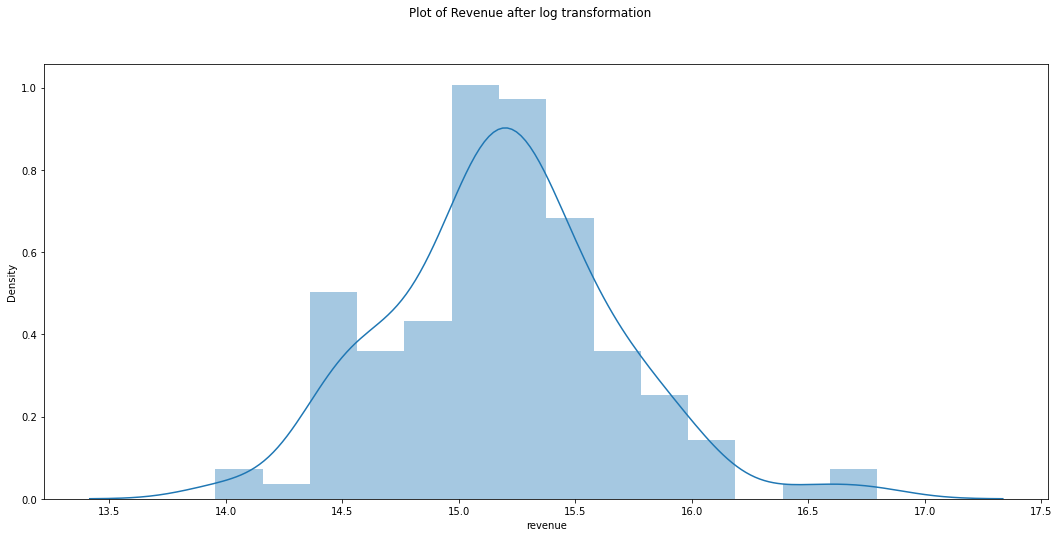

In [ ]:
fig = plt.figure(figsize=(18,8))
Train_encoded['revenue'] = np.log1p(Train_encoded['revenue'])
plt.suptitle("Plot of Revenue after log transformation")
sns.distplot(Train_encoded['revenue'])
plt.show()

## SPLITTING THE DATASET

In [ ]:
X, y = Train_encoded.drop('revenue', axis=1), Train_encoded['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=118)

#MULTIPLE LINEAR REGRESSION

###Simple Linear Regression is not possible in this case as there are multiple independent variables.

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_test, y_pred)
print('Train MSE: ' + str(train_mse) + '\n')
print('Test MSE: ' + str(test_mse) + '\n')
y_test_pred_mlr = np.expm1(regressor.predict(Test_encoded))

Train MSE: 0.12075529195820595

Test MSE: 0.3192631654626014



#POLYNOMIAL REGRESSION

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
y_train_pred = lin_reg.predict(X_poly)
y_pred = lin_reg.predict(X_poly_test)
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_test, y_pred)
print('Train MSE: ' + str(train_mse) + '\n')
print('Test MSE: ' + str(test_mse) + '\n')
y_test_pred_pr = np.expm1(lin_reg.predict(poly_reg.fit_transform(Test_encoded)))

Train MSE: 2.2117054370233137e-29

Test MSE: 0.3297153742895021



##REGRESSION USING DECISION TREE

In [ ]:
regressorDT = DecisionTreeRegressor(random_state = 0)
regressorDT.fit(X_train, y_train)
y_pred = regressorDT.predict(X_test)
y_train_pred = regressorDT.predict(X_train)
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_test, y_pred)
print('Train MSE: ' + str(train_mse) + '\n')
print('Test MSE: ' + str(test_mse) + '\n')
y_test_pred_dt = np.expm1(regressorDT.predict(Test_encoded))

Train MSE: 0.0

Test MSE: 0.33592637911963047



##REGRESSION USING RANDOM FOREST

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
y_test_pred_rf = np.expm1(rf.predict(Test_encoded))
train_mse1 = mean_squared_error(y_train_pred, y_train)
test_mse1 = mean_squared_error(y_test, y_pred)
print('Train MSE: ' + str(train_mse1) + '\n')
print('Test MSE: ' + str(test_mse1) + '\n')

Train MSE: 0.024438153818975995

Test MSE: 0.24601449219628901



### Finding importance of each feature and visualising them

In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Days Open            Importance: 0.17
Variable: P16                  Importance: 0.05
Variable: P28                  Importance: 0.05
Variable: P34                  Importance: 0.05
Variable: P17                  Importance: 0.04
Variable: P30                  Importance: 0.04
Variable: P37                  Importance: 0.04
Variable: P18                  Importance: 0.03
Variable: P24                  Importance: 0.03
Variable: P26                  Importance: 0.03
Variable: P29                  Importance: 0.03
Variable: P35                  Importance: 0.03
Variable: P1                   Importance: 0.02
Variable: P2                   Importance: 0.02
Variable: P12                  Importance: 0.02
Variable: P14                  Importance: 0.02
Variable: P15                  Importance: 0.02
Variable: P21                  Importance: 0.02
Variable: P22                  Importance: 0.02
Variable: P25                  Importance: 0.02
Variable: P27                  Importanc

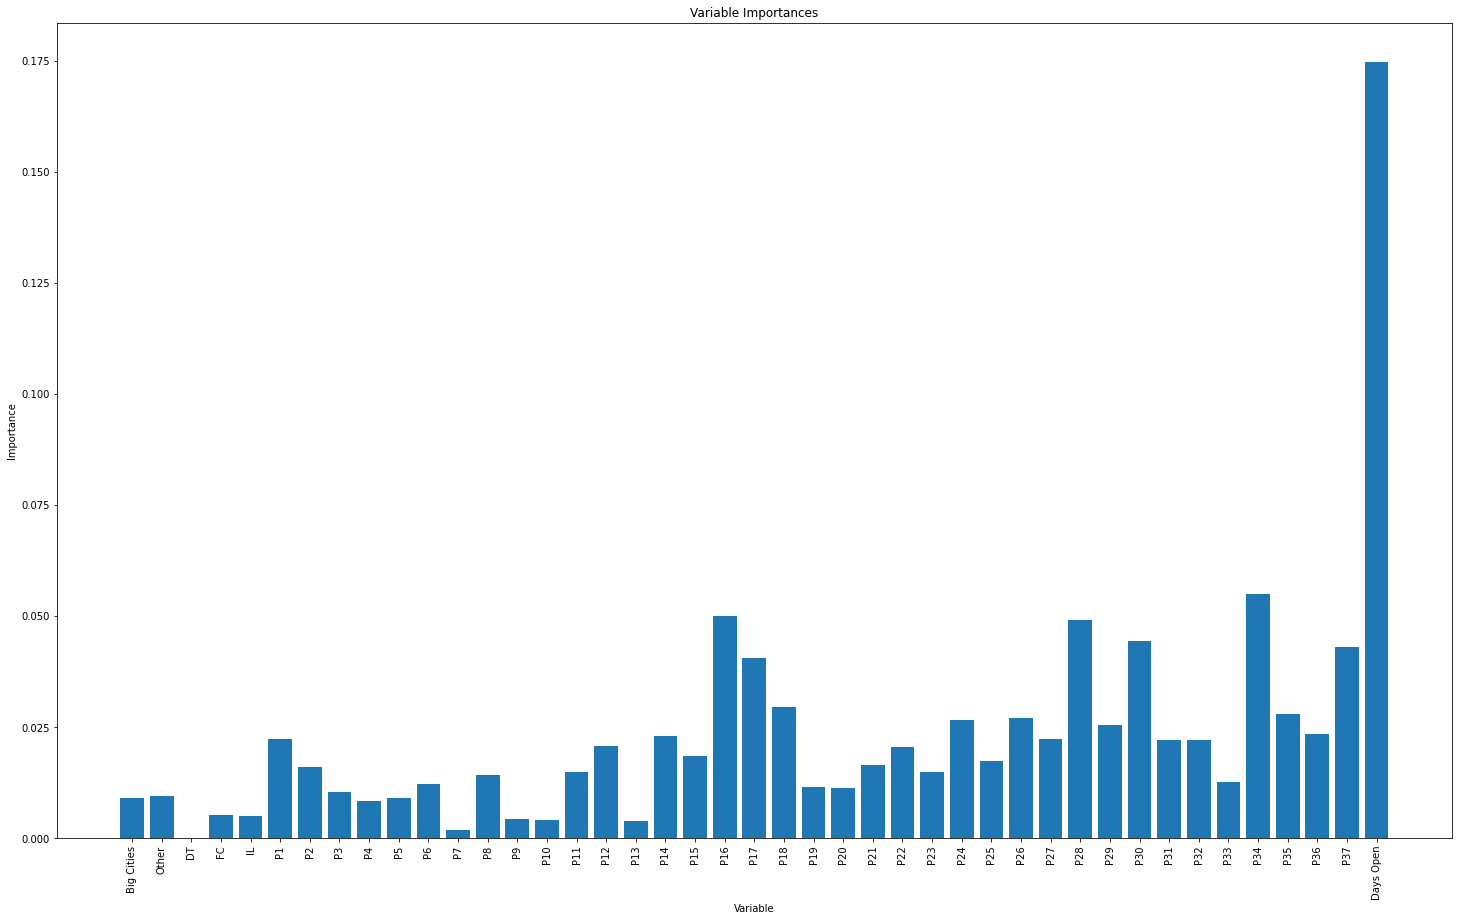

In [ ]:
plt.figure(figsize=(25,15))
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')

plt.xticks(x_values, list(X.columns), rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Visualising Random Forest Graph

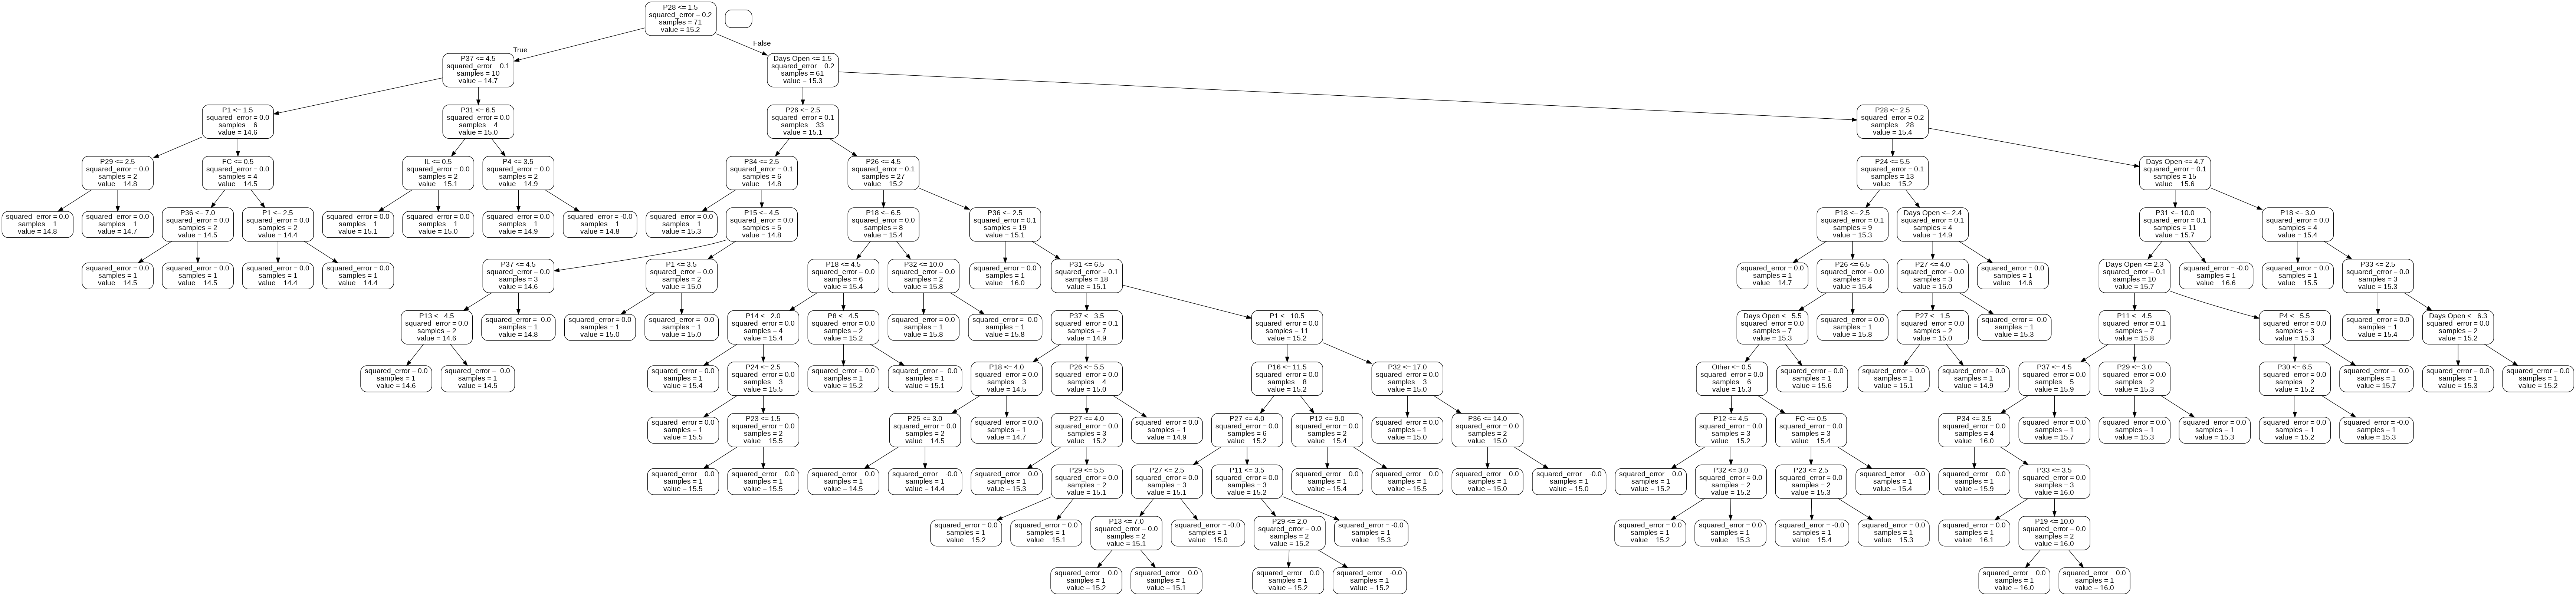

In [ ]:
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = list(X.columns), rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
display(Image('tree.png'))

### Building a new model by only taking the most important metrics

In [ ]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = ['P28','P34','Days Open', 'P16']
train_important = X_train[important_indices].copy()
test_important = X_test[important_indices].copy()
rf_most_important.fit(train_important, y_train)
predictions = rf_most_important.predict(test_important)
predictions_train = rf_most_important.predict(train_important)
predictions_test_pred_rfi = np.expm1(rf_most_important.predict(Test_encoded[['P28','P34','Days Open', 'P16']]))
train_mse2 = mean_squared_error(predictions_train, y_train)
test_mse2 = mean_squared_error(y_test, predictions )
print('Train MSE: ' + str(train_mse2) + '\n')
print('Test MSE: ' + str(test_mse2) + '\n')

Train MSE: 0.025106891923101293

Test MSE: 0.24442905583046876



### Comparing both Random Forest models

In [ ]:
print('Train MSE for Random Forest Model: ' + str(train_mse1) )
print('Test MSE for Random Forest Model: ' + str(test_mse1) + '\n')
print('Train MSE for Random Forest Model with only important features: ' + str(train_mse2))
print('Test MSE for Random Forest Model with only important features: ' + str(test_mse2) + '\n')

Train MSE for Random Forest Model: 0.024438153818975995
Test MSE for Random Forest Model: 0.24601449219628901

Train MSE for Random Forest Model with only important features: 0.025106891923101293
Test MSE for Random Forest Model with only important features: 0.24442905583046876



## Comparing predictions on Test Set of all models

In [ ]:
df_mlr = pd.DataFrame(y_test_pred_mlr, columns = ['MLR'])
df_pr = pd.DataFrame(y_test_pred_pr, columns = ['PR'])
df_dt = pd.DataFrame(y_test_pred_dt, columns = ['DT'])
df_rf = pd.DataFrame(y_test_pred_rf, columns = ['RF'])
df_rfi = pd.DataFrame(predictions_test_pred_rfi, columns = ['RF (Imp)'])
df_all = pd.concat([df_mlr, df_pr, df_dt, df_rf, df_rfi], axis = 1)

In [ ]:
pd.set_option('display.max_rows', 10)
df_all

,MLR,PR,DT,RF,RF (Imp)
0,2.840864e+06,5.006997e+06,5787594.0,4.250783e+06,4.948101e+06
1,3.912501e+06,6.449262e+06,4758476.0,4.058402e+06,3.852470e+06
2,3.447715e+06,4.412923e+06,3780019.0,3.081169e+06,3.206126e+06
3,8.840667e+06,8.973734e+06,2390534.0,3.456100e+06,3.483073e+06
4,7.437322e+06,1.015572e+07,3745135.0,3.496689e+06,3.872780e+06
...,...,...,...,...,...
99995,6.401987e+06,4.683727e+06,2792031.0,4.861870e+06,6.350207e+06
99996,4.954324e+06,4.212825e+06,4467728.0,3.669240e+06,4.451775e+06
99997,3.013030e+06,3.366777e+06,2390534.0,3.245152e+06,3.223329e+06
99998,3.614057e+06,1.427063e+06,3426169.0,3.051311e+06,3.555496e+06
